# MNIST Data

In this exercise, some data preprocessing steps are prepared (look it through so you understand it). Thereafter you will create two models. As always, the documentation is the place to go if you need to deepen your understanding or find out how to do something. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Creating a function that will be used later

In [2]:
def display_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()

# Downloading the data and inspecting it

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

In [4]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [5]:
# Taking less data to speed up training. 
X_train = X[:5000]
y_train = y[:5000]
X_val = X[5000:6000]
y_val = y[5000:6000]

X_test = X[6000:7000]
y_test = y[6000:7000]

# Standardizing the data (as you generally always should do when using SVM models).
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)  # Only transforming the validation data. 
X_test_scaled = scaler.transform(X_test)  # Only transforming the test data. 

In [6]:
# The first label ("true answer") is 5. 
y[0]

5

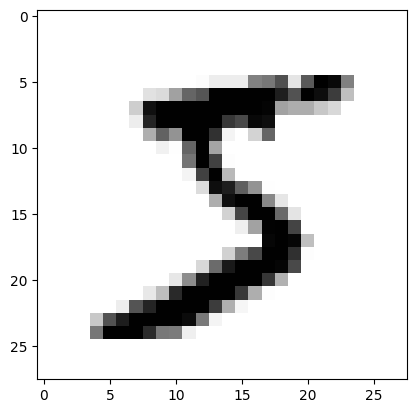

In [7]:
# Plotting the features of the X data, it looks like a 5.
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
# plt.axis("off")

In [8]:
print(X_train.shape)
print(y_train.shape)

(5000, 784)
(5000,)


# Creating a simple modell and evaluating it on the validation set

1. Create a linear support vector classifier model (random_state=42 is just used so we get same results due to the training algorithm beeing stochastic.):
```python
lin_clf = LinearSVC(random_state=42)
```

2. Fit the model on the scaled training data. **You might get an warning, ignore it.**
3. Predict the scaled validation data. 
4. Compute accuracy score, use the imported functionality: 
```python
from sklearn.metrics import accuracy_score
```
5. Visualize the confusion matrix, use the function we created: 
```python
def display_confusion_matrix
```

In [9]:
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train_scaled, y_train)

C:\ProgramData\anaconda3\envs\AI_1\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\ProgramData\anaconda3\envs\AI_1\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=42)

In [10]:
y_pred_linear = lin_clf.predict(X_val_scaled)
accuracy_score(y_val, y_pred_linear)

0.844

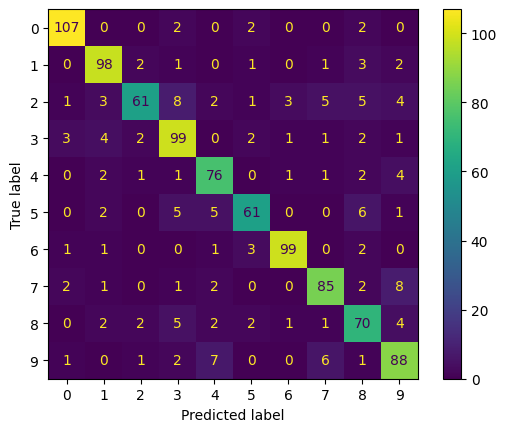

In [11]:
display_confusion_matrix(y_val, y_pred_linear)

# Modell Selection with Gridsearch
## Doing GridSearch (Takes a while to run) - remove the comments if you want to run the code

1. Create an instance of a general (not linear) SVC model. 
```python
svm_clf = SVC()
```
2. Specify a hyperparameter grid:
```python
hyper_param_grid = [
    {'kernel': ['rbf', 'poly'], 'gamma': [1, 2], 'C': [0.5, 1, 1.5]}
]
```
3. Use GridSearchCV and fit the model with the hyperparameter grid above **(note, fitting the model with grid_search takes a while)**.
4. If you for instance called your fine-tuned model in the step above for "gs_svm", then you can run this code:
```python
pd.DataFrame(gs_svm.cv_results_)
```
to analyze the grid search results. 

5. Predict the scaled validation data, compute the accuracy score, visualize the confusion matrix. 


6. Which model is better, the linear created above or this one where we used GridSearch?

In [12]:
svm_clf = SVC()

hyper_param_grid = [
    {'kernel': ['rbf', 'poly'], 'gamma': [1, 2], 'C': [0.5, 1, 1.5]}
]

gs_svm = GridSearchCV(svm_clf, hyper_param_grid, cv = 3)
gs_svm.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid=[{'C': [0.5, 1, 1.5], 'gamma': [1, 2],
                          'kernel': ['rbf', 'poly']}])

In [13]:
pd.DataFrame(gs_svm.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,22.096848,6.079021,8.075995,0.474185,0.5,1,rbf,"{'C': 0.5, 'gamma': 1, 'kernel': 'rbf'}",0.112777,0.112178,0.112845,0.112600,0.000300,7
1,5.694515,0.582527,3.257749,0.064656,0.5,1,poly,"{'C': 0.5, 'gamma': 1, 'kernel': 'poly'}",0.910618,0.943011,0.933373,0.929001,0.013581,1
2,12.417435,1.817376,6.307599,0.550427,0.5,2,rbf,"{'C': 0.5, 'gamma': 2, 'kernel': 'rbf'}",0.112777,0.112178,0.112845,0.112600,0.000300,7
3,5.896165,2.489290,2.535179,0.074348,0.5,2,poly,"{'C': 0.5, 'gamma': 2, 'kernel': 'poly'}",0.910618,0.943011,0.933373,0.929001,0.013581,1
4,9.099430,0.552259,5.390812,0.388715,1,1,rbf,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.112777,0.112178,0.112845,0.112600,0.000300,7
5,3.859696,0.166999,2.981901,0.743822,1,1,poly,"{'C': 1, 'gamma': 1, 'kernel': 'poly'}",0.910618,0.943011,0.933373,0.929001,0.013581,1
6,8.448612,0.302523,5.429176,0.311984,1,2,rbf,"{'C': 1, 'gamma': 2, 'kernel': 'rbf'}",0.112777,0.112178,0.112845,0.112600,0.000300,7
7,3.889891,0.471055,2.395428,0.169380,1,2,poly,"{'C': 1, 'gamma': 2, 'kernel': 'poly'}",0.910618,0.943011,0.933373,0.929001,0.013581,1
8,8.346637,0.126510,4.944229,0.095630,1.5,1,rbf,"{'C': 1.5, 'gamma': 1, 'kernel': 'rbf'}",0.112777,0.112178,0.112845,0.112600,0.000300,7
9,3.339080,0.211881,2.323924,0.214548,1.5,1,poly,"{'C': 1.5, 'gamma': 1, 'kernel': 'poly'}",0.910618,0.943011,0.933373,0.929001,0.013581,1


In [14]:
y_pred_gs_svm = gs_svm.predict(X_val_scaled)
accuracy_score(y_val, y_pred_gs_svm)

0.94

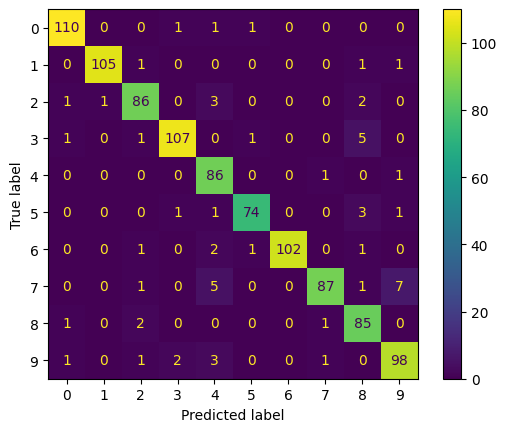

In [15]:
display_confusion_matrix(y_val, y_pred_gs_svm)

# Model Evaluation on Test Data
The linear model was better on the validation data if we decide to use the accuracy score as a metric, so we choose that model and evaluate it on the scaled test set. 

In [19]:
y_pred_test = gs_svm.predict(X_test_scaled)

In [20]:
accuracy_score(y_test, y_pred_test)

0.939

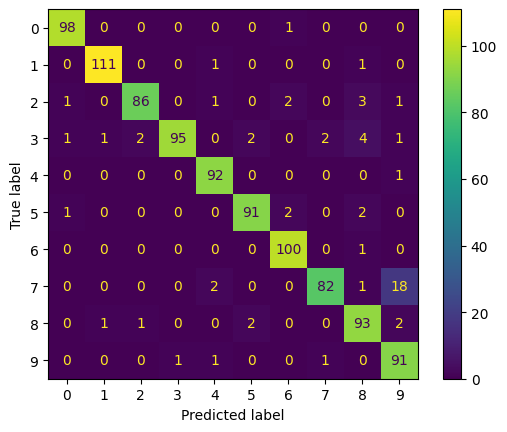

In [21]:
display_confusion_matrix(y_test, y_pred_test)